In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


Compare the $R^2$ of $y$ with that of $\log(y)$. We see that it depends on the function and on the size of the fluctuations. 
With $\exp(x)$, taking the logarithm gives better performances.
With $\sin(x)$ and large fluctuations, taking the logarithm gives worse performances.

The Pearson coefficients give generally higher values than the $R^2$.

In [3]:
# Create function for R2

def R2(ytrue,ypred):
    av   = ytrue.mean()
    err2 = np.square(ytrue-ypred).sum()
    res  = np.square(ytrue-av).sum()
    return 1-err2/res

def Pearson(ytrue,ypred):
    resTrue = np.square(ytrue.mean()-ytrue).sum()
    resPred = np.square(ypred.mean()-ypred).sum()
    resComb = np.sum((ytrue.mean()-ytrue)*(ypred.mean()-ypred))
    return resComb/np.sqrt(resTrue*resPred)
    
    
    

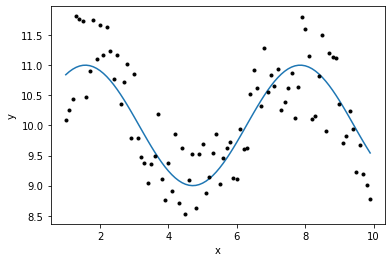

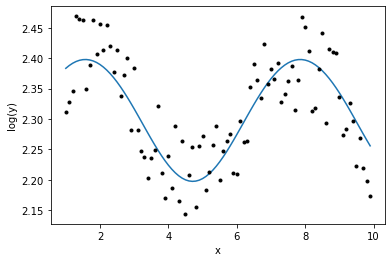

In [4]:
# Create fake data and predictions
eps=0.08 # relative size of errors
x=np.arange(1,10,.1)


ytrue = np.sin(x)+10 #Add 10 in order to avoid negative numbers that bother the log
# ytrue = np.exp(x)
ypred = ytrue + eps*(2.0*np.random.rand(len(x))-1.0)*ytrue

plt.plot(x,ytrue, label = 'Truth')
plt.plot(x,ypred,'.', label = 'Predictions', color='black')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

plt.plot(x,np.log(ytrue), label = 'Truth')
plt.plot(x,np.log(ypred),'.', label = 'Predictions', color='black')
plt.ylabel('log(y)')
plt.xlabel('x')
plt.show()

In [5]:
print('R2(y)    =',R2(ytrue,ypred))
print('R2(logy) =',R2(np.log(ytrue),np.log(ypred)))

print('\nPearson(y)    =',Pearson(ytrue,ypred))
print('Pearson(logy) =',Pearson(np.log(ytrue),np.log(ypred)))

print('\nPearson(y)^2    =',Pearson(ytrue,ypred)**2)
print('Pearson(logy)^2 =',Pearson(np.log(ytrue),np.log(ypred))**2)

R2(y)    = 0.4612392877473379
R2(logy) = 0.485557017075988

Pearson(y)    = 0.8184534633888751
Pearson(logy) = 0.8215864541349033

Pearson(y)^2    = 0.6698660717332448
Pearson(logy)^2 = 0.6750043016179635


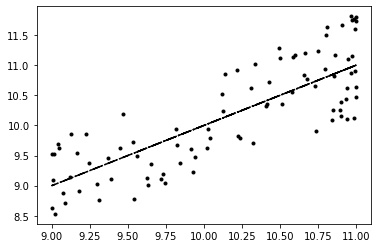

In [13]:
plt.plot(ytrue,ypred, '.', color='black')
plt.plot(ytrue,ytrue, '-.', color='black')
